# **Evaluation of Regression & Classification Models**

<h1 style="font-family: 'poppins'; font-weight: bold; color: white;">👨‍💻Author: Hamza Kamelen</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/hamzakamelen) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/hamzakamelen) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/hamzakamelen)  

[![YouTube](https://img.shields.io/badge/YouTube-Profile-red?style=for-the-badge&logo=youtube)](https://www.youtube.com/@hamzakamelen1944) 
[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/hamzakamelen)
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:hamzakamelen.dev@gmail.com)

### Introduction

The primary goal of this notebook is to evaluate the performance of regression and classification models, both regression and classification models is used to identify the accurate model for prediction the target variable. This notebook is divided into two parts, the first part is for regression models and the second part is for classification models. The dataset used in this notebook is the `Diamond Dataset` which is available in the `seaborn` library. The target variable for regression is `price` and for classification is `cut`. 

This dataset contain 10 columns and 53940 rows but for simplicity, only 10000 rows are used in this notebook. 

### Goals
- To select the best model for regression and classification
- To evaluate the performance of the models
- To compare the performance of the models

### Evaluated Algorithms:

**Regression Models:**
- Linear Regression
- Decision Tree Regressor
- Random Forest Regressor
- Gradient Boosting Regressor
- Support Vector Regressor
- K-Nearest Neighbors Regressor
- XGBoost Regressor
- LightGBM Regressor
- CatBoost Regressor
- AdaBoost Regressor

**Classification Models:**
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting Classifier
- Support Vector Classifier
- K-Nearest Neighbors Classifier
- XGBoost Classifier
- LightGBM Classifier
- CatBoost Classifier
- AdaBoost Classifier

### Dataset Description:

The dataset contains the following columns:

- `carat`: weight of the diamond (0.2--5.01)
- `cut`: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- `color`: diamond colour, from J (worst) to D (best)
- `clarity`: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- `depth`: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- `table`: width of top of diamond relative to widest point (43--95)
- `price`: price in US dollars (\$326--\$18,823)
- `x`: length in mm (0--10.74)
- `y`: width in mm (0--58.9)
- `z`: depth in mm (0--31.8)

In [64]:
# Import Libraries and Models

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,GradientBoostingClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVR,SVC
from catboost import CatBoostRegressor,CatBoostClassifier
from xgboost import XGBRegressor,XGBClassifier
from lightgbm import LGBMRegressor,LGBMClassifier

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.pipeline import Pipeline

In [65]:
# Ignore Warnings

import warnings
warnings.filterwarnings('ignore')

In [66]:
# Load Data

df = sns.load_dataset('diamonds').sample(10000, random_state=42)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


In [67]:
# Check the Shape of the Data

df.shape

(10000, 10)

In [68]:
# Checking Null Values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [69]:
# Split Data into X and y

X=df.drop(columns='price')
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Regression Models

models = [
    ('LinearRegression', LinearRegression(),{}),
    ('LGBMRegressor', LGBMRegressor(),{}),
    ('KNeighborsRegressor', KNeighborsRegressor(),{'n_neighbors': [3, 5, 7],'metric': ['euclidean', 'manhattan', 'minkowski'],'p':[1, 2]}),
    ('RandomForestRegressor', RandomForestRegressor(),{'n_estimators': [50,100, 200],'max_depth': [5, 10, 20],'random_state':[42]}),
    ('GradientBoostingRegressor', GradientBoostingRegressor(),{'n_estimators': [100, 200, 300],'max_depth': [10, 20, 30]}),
    ('DecisionTreeRegressor', DecisionTreeRegressor(),{'max_depth': [10, 20, 30],'random_state':[42]}),
    ('SVR', SVR(),{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'degree': [2, 3, 4],'C': [0.1, 1, 10],'epsilon': [0.1, 0.2, 0.5]}),
    ('CatBoostRegressor', CatBoostRegressor(),{'iterations': [100, 200, 300],'learning_rate': [0.01, 0.1, 1],'depth': [4, 6, 8]}),
    ('XGBRegressor', XGBRegressor(),{'n_estimators': [100, 200, 300],'max_depth': [10, 20, 30],'learning_rate': [0.01, 0.1, 1],'gamma': [0.1, 0.2, 0.5]}),
    ('AdaBoostRegressor', AdaBoostRegressor(),{'n_estimators': [50,100, 200],'learning_rate': [0.01, 0.1, 1]}),
]

In [71]:
# Checking the Data Types of the Columns

df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [72]:
# Splitting the Data into Numerical and Categorical Columns

num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(include='category').columns.tolist()

num_cols, cat_cols

(['carat', 'depth', 'table', 'x', 'y', 'z'], ['cut', 'color', 'clarity'])

In [73]:
# Define the column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(),num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

In [74]:
# Run and Evaluate the Models

results = []

for name, model, params in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    # Prefix the parameters with 'model__'
    params = {f'model__{key}': value for key, value in params.items()}
    grid = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='r2')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('---------------------------------')
    print(f'{name}:')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'R-Squared: {r2}')
    print('---------------------------------')
    
    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R-Squared': r2
    })
    
# print(f'Best params: {grid.best_params_}')
# print(f'Best score: {grid.best_score_}')

results_df = pd.DataFrame(results)  


---------------------------------
LinearRegression:
RMSE: 1104.7451241038234
MAE: 738.8481221485198
R-Squared: 0.9242859564067798
---------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1122
[LightGBM] [Info] Number of data points in the train set: 5333, number of used features: 26
[LightGBM] [Info] Start training from score 3918.934371
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1118
[LightGBM] [Info] Number of data points in the train set: 5333, number of used features: 26
[LightGBM] [Info] Start training from score 3860.115882
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_col_wise=true` to remove 

In [76]:
# Save the results in Dataframe and Sort the results by R-Squared

results_df = results_df.sort_values(by='R-Squared', ascending=False)
results_df

,Model,RMSE,MAE,R-Squared
1,LGBMRegressor,586.549820,309.499895,0.978657
7,CatBoostRegressor,590.413162,310.544804,0.978375
4,GradientBoostingRegressor,614.585979,314.513153,0.976568
8,XGBRegressor,622.793455,311.188049,0.975938
3,RandomForestRegressor,628.693462,329.967988,0.975479
5,DecisionTreeRegressor,876.253291,469.492022,0.952367
0,LinearRegression,1104.745124,738.848122,0.924286
2,KNeighborsRegressor,1162.812804,541.714333,0.916117
9,AdaBoostRegressor,1393.382817,982.942499,0.879554
6,SVR,2104.308299,1055.015279,0.725292


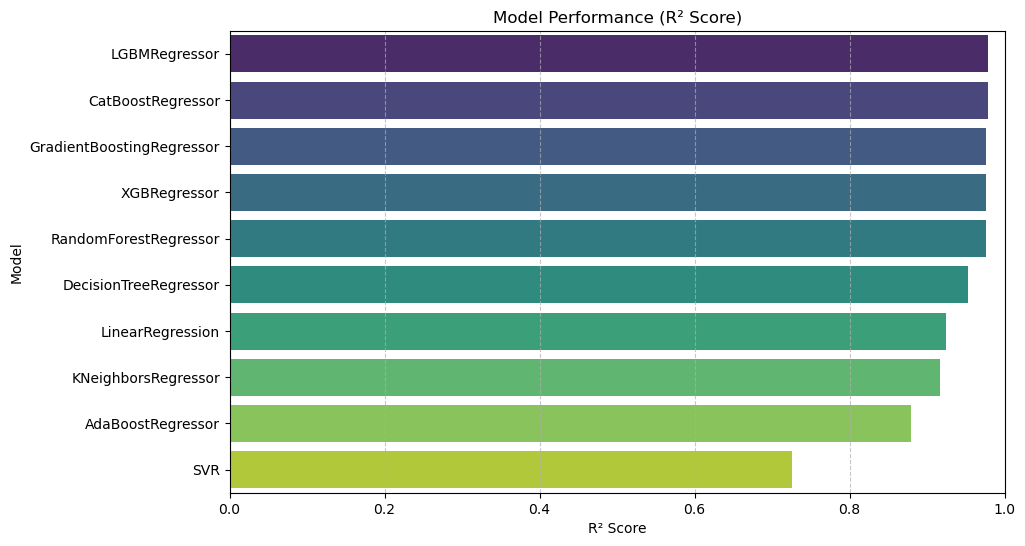

In [77]:
# Plot bar chart according to R-Squared

plt.figure(figsize=(10, 6))
sns.barplot(x='R-Squared', y='Model', data=results_df, palette='viridis')

# Add labels and title
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.title('Model Performance (R² Score)')
plt.xlim(0, 1)  # Since R² is typically between 0 and 1
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [78]:
best_model_scores = results_df.iloc[0]
best_model_scores

Model        LGBMRegressor
RMSE             586.54982
MAE             309.499895
R-Squared         0.978657
Name: 1, dtype: object

In [ ]:
best_model = None
for name, model, params in models:
	if name == best_model_scores['Model']:
		best_model = model
		break

best_model

LGBMRegressor()

In [83]:
cat_features = ['cut', 'color', 'clarity']
best_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002721 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1138
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 9
[LightGBM] [Info] Start training from score 3891.476250


LGBMRegressor()

In [84]:
y_pred = best_model.predict(X_test)
y_pred

array([  961.21236743,  8155.39183684,  4644.71888157, ...,
        6519.87596282, 11799.64522571,   588.90925655])

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('---------------------------------')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-Squared: {r2}')
print('---------------------------------')

---------------------------------
RMSE: 603.9551527236779
MAE: 311.4255614166713
R-Squared: 0.9773711941852162
---------------------------------


In [ ]:
# Save and Load the Model
import joblib
joblib.dump(model, "5.Choosing_best_regression_model.pkl")

model_loaded = joblib.load('5.Choosing_best_regression_model.pkl')
model_loaded.predict(X_test)

array([  961.21236743,  8155.39183684,  4644.71888157, ...,
        6519.87596282, 11799.64522571,   588.90925655])

### Conclusion of Regression Models:
- The best model for regression is `LightGBM Regressor` with an `R2 Score` of `0.978657` and `RMSE` of `586.5` and `MAE` of `309.499`.
- The 2nd best model for regression is `CatBoost Regressor` with an `R2 Score` of `0.978375` and `RMSE` of `590.413` and `MAE` of `310.54`.
- The worst model for regression is `SVR` with an `R2 Score` of `0.725292` and `RMSE` of `2104.308299` and `MAE` of `1055.015279`.


### Evaluation of Classification Models

In [124]:
df = sns.load_dataset('diamonds').sample(10000, random_state=42)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1388,0.24,Ideal,G,VVS1,62.1,56.0,559,3.97,4.00,2.47
50052,0.58,Very Good,F,VVS2,60.0,57.0,2201,5.44,5.42,3.26
41645,0.40,Ideal,E,VVS2,62.1,55.0,1238,4.76,4.74,2.95
42377,0.43,Premium,E,VVS2,60.8,57.0,1304,4.92,4.89,2.98
17244,1.55,Ideal,E,SI2,62.3,55.0,6901,7.44,7.37,4.61


In [135]:
classification_models = [
    ('LogisticRegression', LogisticRegression(),{}),
    ('LGBMClassifier', LGBMClassifier(),{}),
    ('KNeighborsClassifier', KNeighborsClassifier(),{'n_neighbors': [3, 5, 7],'metric': ['euclidean', 'manhattan', 'minkowski','hamming'],'p':[1, 2]}),
    ('RandomForestClassifier', RandomForestClassifier(),{'n_estimators': [50,100, 150],'max_depth': [5,10, 20],'random_state':[42]}),
    ('GradientBoostingClassifier', GradientBoostingClassifier(),{'n_estimators': [50,100, 150],'max_depth': [5,10, 20]}),
    ('DecisionTreeClassifier', DecisionTreeClassifier(),{'max_depth': [5,10, 20],'random_state':[42]}),
    ('SVC', SVC(),{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],'degree': [2, 3, 4],'C': [0.1, 1, 10],'random_state':[42]}),
    ('CatBoostClassifier', CatBoostClassifier(),{'iterations': [50,100, 150],'learning_rate': [0.01, 0.1, 1],'depth': [4, 6, 8]}),
    ('XGBClassifier', XGBClassifier(),{'n_estimators': [50,100, 150],'max_depth': [5,10, 20],'learning_rate': [0.01, 0.1, 1],'gamma': [0.1, 0.2, 0.5]}),
    ('AdaBoostClassifier', AdaBoostClassifier(),{'n_estimators': [50,100, 150],'learning_rate': [0.01, 0.1, 1]}),
]

In [136]:
x = df.drop(columns=['cut'])
y = df['cut']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [137]:
df.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [138]:
# Splitting the Data into Numerical and Categorical Columns

num_cols = x.select_dtypes(include=np.number).columns.tolist()
cat_cols = x.select_dtypes(include='category').columns.tolist()

num_cols, cat_cols

(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], ['color', 'clarity'])

In [ ]:
# Run and Evaluate the Models
results_classification = []

# Define the column transformer for classification
preprocessor_classification = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

for name, model, params in classification_models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor_classification),
                               ('model', model)])
    
    # Prefix the parameters with 'model__'
    params = {f'model__{key}': value for key, value in params.items()}
    grid = GridSearchCV(pipeline, param_grid=params, cv=3, scoring='accuracy')
    grid.fit(x_train, y_train_encoded)
    y_pred = grid.predict(x_test)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)
    accuracy = accuracy_score(y_test, y_pred_decoded)
    precision = precision_score(y_test, y_pred_decoded, average='weighted')
    recall = recall_score(y_test, y_pred_decoded, average='weighted')
    f1 = f1_score(y_test, y_pred_decoded, average='weighted')
    print('---------------------------------')
    print(f'{name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('---------------------------------')
    
    results_classification.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

---------------------------------
LogisticRegression:
Accuracy: 0.6425
Precision: 0.6118990998210789
Recall: 0.6425
F1 Score: 0.6181630567520207
---------------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1368
[LightGBM] [Info] Number of data points in the train set: 5333, number of used features: 22
[LightGBM] [Info] Start training from score -3.519074
[LightGBM] [Info] Start training from score -2.359093
[LightGBM] [Info] Start training from score -0.912641
[LightGBM] [Info] Start training from score -1.370112
[LightGBM] [Info] Start training from score -1.512646
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bi

In [162]:
classification_results_df = pd.DataFrame(results_classification)
classification_results_df = classification_results_df.sort_values(by='Accuracy', ascending=False)
classification_results_df

,Model,Accuracy,Precision,Recall,F1 Score
1,LGBMClassifier,0.7740,0.768138,0.7740,0.768098
4,GradientBoostingClassifier,0.7710,0.764320,0.7710,0.764266
8,XGBClassifier,0.7640,0.756432,0.7640,0.753424
7,CatBoostClassifier,0.7470,0.737855,0.7470,0.739131
6,SVC,0.7305,0.721791,0.7305,0.723020
3,RandomForestClassifier,0.7295,0.717776,0.7295,0.715381
5,DecisionTreeClassifier,0.7280,0.721867,0.7280,0.705540
9,AdaBoostClassifier,0.6910,0.671120,0.6910,0.655316
0,LogisticRegression,0.6425,0.611899,0.6425,0.618163
2,KNeighborsClassifier,0.6245,0.593428,0.6245,0.595863


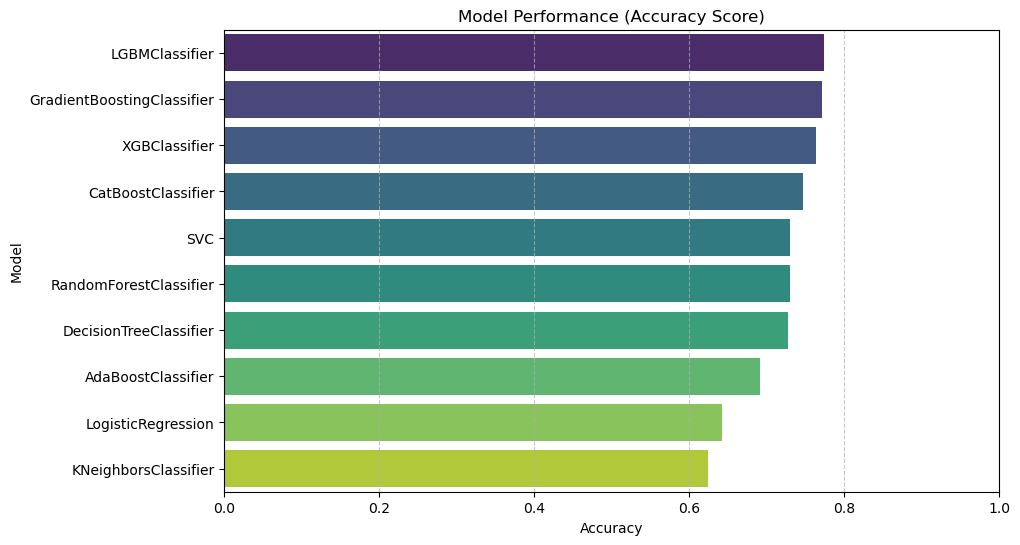

In [163]:
# Plot bar chart according to Accuracy Score

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=classification_results_df, palette='viridis')

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Performance (Accuracy Score)')
plt.xlim(0, 1)  
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [164]:
classification_best_model_scores = classification_results_df.iloc[0]
classification_best_model_scores

Model        LGBMClassifier
Accuracy              0.774
Precision          0.768138
Recall                0.774
F1 Score           0.768098
Name: 1, dtype: object

In [165]:
classification_best_model_scores['Model']

'LGBMClassifier'

In [167]:
classification_best_model = None
for name, model, params in classification_models:
	if name == classification_best_model_scores['Model']:
		classification_best_model = model
		break

classification_best_model

LGBMClassifier()

In [168]:
classification_best_model.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 9
[LightGBM] [Info] Start training from score -3.519137
[LightGBM] [Info] Start training from score -2.359155
[LightGBM] [Info] Start training from score -0.912859
[LightGBM] [Info] Start training from score -1.369929
[LightGBM] [Info] Start training from score -1.512425


LGBMClassifier()

In [170]:
y_pred = classification_best_model.predict(x_test)
y_pred

array(['Ideal', 'Premium', 'Premium', ..., 'Good', 'Very Good', 'Ideal'],
      dtype=object)

In [171]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('---------------------------------')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('---------------------------------')

---------------------------------
Accuracy: 0.778
Precision: 0.7725406768587647
Recall: 0.778
F1 Score: 0.7727641868119077
---------------------------------


In [ ]:
# Save and Load the Model
import joblib
joblib.dump(model, "Choosing_best_classification_model.pkl")

model_loaded2 = joblib.load('Choosing_best_classification_model.pkl')
model_loaded2.predict(X_test)

array(['Ideal', 'Premium', 'Premium', ..., 'Good', 'Very Good', 'Ideal'],
      dtype=object)

### Conclusion of Classification Models:

- The best model for classification is `LightGBM Classifier` with an `Accuracy` of `0.7740` and `F1 Score` of `0.768098`.
- The 2nd best model for classification is `Gradient Boosting Classifier` with an `Accuracy` of `0.7710` and `F1 Score` of `0.764266`.
- The worst model for classification is `K-Nearest Neighbors Classifier` with an `Accuracy` of `0.6245` and `F1 Score` of `0.595863`.

---

### Conclusion of Evaluation:
- The best model for Regression is `LightGBM Regressor` with an `R2 Score` of `0.978657` and `RMSE` of `586.5` and `MAE` of `309.499`.
- The best model for Classification is `LightGBM Classifier` with an `Accuracy` of `0.7740` and `F1 Score` of `0.768098`.